# Pumpkin Seed Assignment - Group 6

Team members:
 - Phuong Le
 - Hiep Huynh
 - Xin Feng

## Information about the dataset

The dataset:
- Features: 13 features
- Target:  2 pumpkin class: Çerçevelik, Ürgüp Sivrisi
  
Pumpkin seeds dataset https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset/data

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [2]:
# load the dataset
seed = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
seed.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [3]:
# check the data information
seed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [4]:
# check if there is any null value
seed.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [5]:
seed.iloc[:,-1]

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object

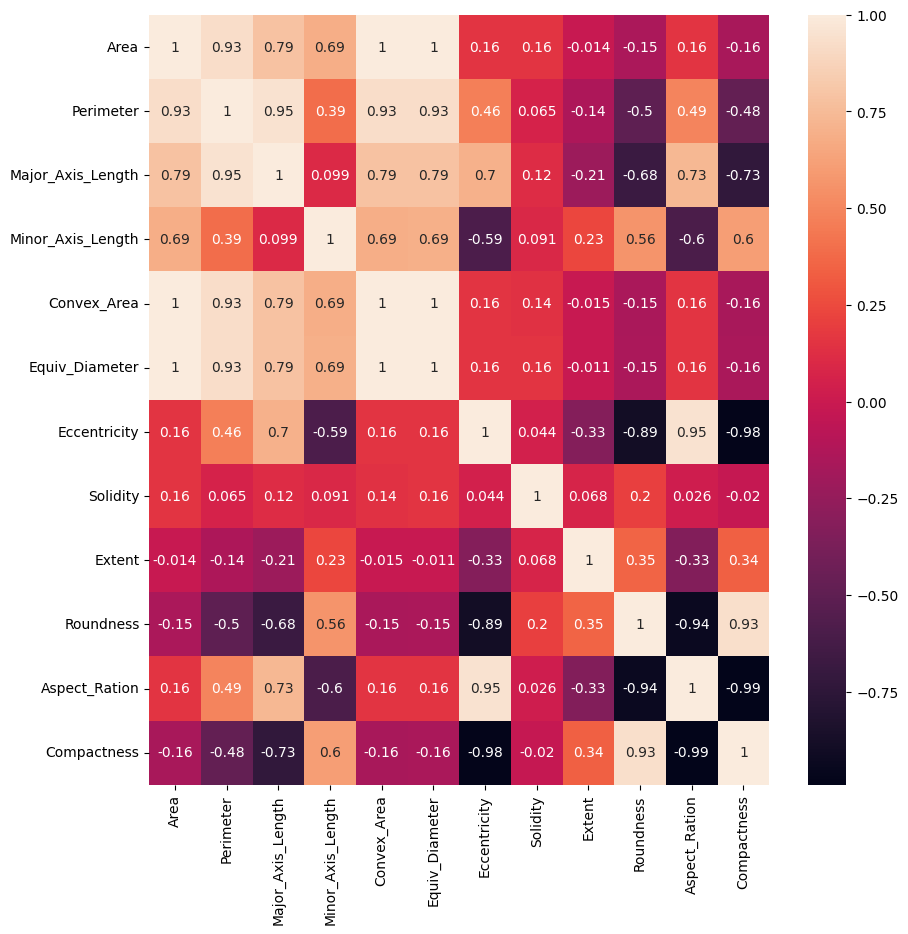

In [6]:
#Correlation map
seed_corr = seed.iloc[:,:-1].corr()
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(seed_corr, annot=True,ax=ax)
plt.show()


In [ ]:
#check out the column names
seed.columns

In [ ]:
#Visualizing the dataset 
plt.scatter(seed['Area'],seed['Perimeter'])
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.show()

In [ ]:
# Visualize all features and target
sns.pairplot(seed, hue='Class', diag_kind='kde', palette='Set2')
plt.show()

## The label variable

In [ ]:
# Check unique values in the class column
seed['Class'].unique()

In [ ]:
# Area, Perimeter, Major_Axis_Length, Minor_Axis_Length, Convex_Area, Equiv_Diameter, Eccentricity,
# Solidity, Extent, Roundness, Aspect_Ration, Compactness, Class
# Encoding the class column using get_dummies, use drop_first to merge the column to one instead of having two
seed = pd.get_dummies(seed,drop_first = True)
#Rename the column name
seed.rename(columns = {'Class_Ürgüp Sivrisi': 'Class'}, inplace = True)
seed.head()

In [ ]:
# Split the data into features and target variable
X = seed.drop('Class',axis=1)
y = seed['Class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
print("Raw X_train variance:", X_train.var())
print("Scaled X_train variance:", StandardScaler().fit_transform(X_train).var())

## Model 1: Linear SVM

### Linear SVM without Scale

In [ ]:
# Create a basic linear SVM model
from sklearn.metrics import accuracy_score
# Soft margin SVM (low C)
C = [0.01, 0.1, 0.5, 1.0, 10, 100]
max_accuracy = 0
best_c_0 = None
for c in C:
    soft_svm = SVC(kernel='linear', C=c)
    soft_svm.fit(X_train, y_train)
    y_pred_soft = soft_svm.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred_soft)
    print(f"Accuracy at c = {c}: {acc:.3f}")
    if acc > max_accuracy:
        max_accuracy = acc
        best_c = c
        

print("")
print("Soft Margin Linear SVM")
print(f"Best Accuracy at c = {best_c}: {max_accuracy:.3f}")
print(classification_report(y_valid, y_pred_soft))
print(confusion_matrix(y_valid, y_pred_soft))

### Linear SVM with Scale

In [ ]:
C = [0.01, 0.1, 1.0, 5.0, 10, 100.0]
max_accuracy = 0
best_c = None
for c in C:
    svm_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='linear', C=c))
    ])

    svm_pipe.fit(X_train, y_train)
    y_pred = svm_pipe.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print(f"Accuracy at c = {c}: {acc:.3f}")
    if acc > max_accuracy:
        max_accuracy = acc
        best_c = c
    
print("")
print("Linear SVM with scaled data")
print(f"Best Accuracy at c = {best_c}: {max_accuracy:.3f}")
print(classification_report(y_valid, y_pred_soft))
print(confusion_matrix(y_valid, y_pred_soft))

### The Best Linear SVM

In [ ]:
# We apply the grid search to find the best parameters for the SVM model
# We didn't use `gamma='scale'` here because in the official documentation,
# there is no `gamma` parameter for the linear kernel.
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

svm_grid_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

grid = GridSearchCV(svm_grid_pipe, {
    'svm__C': [0.01, 0.1, 1, 10, 100, 1000],
}, cv=5, n_jobs=-1, scoring='accuracy')

grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)
y_pred = grid.best_estimator_.predict(X_valid)
print("Test accuracy:", accuracy_score(y_valid, y_pred))

### Apply The Best SVM

In [ ]:
# We use the best parameters to create a new SVM model
best_svm_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear', C = 100))
])

best_svm_pipe.fit(X_train, y_train)
y_pred = best_svm_pipe.predict(X_valid)

print("Best SVM with scaled data")
print("Accuracy:", accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))
print(confusion_matrix(y_valid, y_pred))
# Plot the confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_pipe.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



## Model 2: Polynomial SVM

### Polynomial without Scale

In [ ]:
C = [1.0, 5.0, 10.0, 15.0, 100.0]
max_accuracy = 0
best_c = None
best_d = None
deg = [2, 3, 4, 5]
for c in C:
    for d in deg:
        svm_poly = SVC(kernel='poly', degree=d, C=c, gamma='scale')
        svm_poly.fit(X_train, y_train)
        y_pred = svm_poly.predict(X_valid)
        acc = accuracy_score(y_valid, y_pred)
        print(f"Accuracy at degree = {d}, c = {c}: {acc:.3f}")
        if acc > max_accuracy:
            max_accuracy = acc
            best_c = c
            best_d = d
print("*****************************")
print("Polynomial SVM")
print(f"Max Accuracy at degree = {best_d}, c = {best_c}: {max_accuracy:.3f}")
print("*****************************")
print("Raw X_train variance:", X_train.var())
print("Scaled X_train variance:", StandardScaler().fit_transform(X_train).var())

### Polynomial SVM with Scaled data

In [ ]:
C = [0.1, 1.0, 5.0, 10.0, 15.0, 100.0]
max_accuracy = 0
best_c = None
best_d = None
deg = [2, 3, 4, 5]

for c in C:
    for d in deg:
        svm_poly_pipe = Pipeline([
            ('scaler', StandardScaler()),
            ('svm', SVC(kernel='poly', degree=d, C=c, gamma='scale'))
        ])
        svm_poly_pipe.fit(X_train, y_train)
        y_pred = svm_poly_pipe.predict(X_valid)
        acc = accuracy_score(y_valid, y_pred)
        print(f"Accuracy at degree = {d}, c = {c}: {acc:.3f}")
        if acc > max_accuracy:
            max_accuracy = acc
            best_c = c
            best_d = d
print("*******************************")
print("Polynomial SVM with scaled data")

print(f"Accuracy at degree = {best_d}, c = {best_c}: {max_accuracy}", )

### Best Polynomial SVM Hyperparameter

In [ ]:
svm_poly_grid_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly'))
])
grid = GridSearchCV(svm_poly_grid_pipe, {
    'svm__C': [0.1, 1, 10, 100, 1000],
    'svm__degree': [2, 3, 4, 5],
    'svm__gamma': ['scale', 'auto'],
    'svm__coef0': [0.0, 0.1, 0.5, 1.0]
}, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)
y_pred = grid.best_estimator_.predict(X_valid)
print("Test accuracy:", accuracy_score(y_valid, y_pred))

### Apply Best Polynomial SVM

In [ ]:
best_svm_poly_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='poly', C=100, degree=3, gamma='scale', coef0=1.0))
])

best_svm_poly_pipe.fit(X_train, y_train)
y_pred = best_svm_poly_pipe.predict(X_valid)
print("Best Polynomial SVM with scaled data")
print("Accuracy:", accuracy_score(y_valid, y_pred))

# Classification report
print(classification_report(y_valid, y_pred))
# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_poly_pipe.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Model 3: RBF SVM

### Basic RBF SVM

In [ ]:
C = [1.0, 5.0, 10.0, 15.0, 100.0, 1000.0]
max_accuracy = 0
best_c = None
for c in C:
    rbf_svm = SVC(kernel='rbf', C=c, gamma='scale')
    rbf_svm.fit(X_train, y_train)
    y_pred_rbf = rbf_svm.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred_rbf)
    print(f"Accuracy at c = {c}: {acc}")
    if acc > max_accuracy:
        max_accuracy = acc
        best_c = c

print("**************************")
print("Radial Basis Function SVM")
print(f"Max Accuracy at C = {best_c}: {max_accuracy:.3f}")
print(classification_report(y_valid, y_pred_rbf))
print(confusion_matrix(y_valid, y_pred_rbf))

### RBF SVM with Scale

In [ ]:
C = [1.0, 5.0, 10.0, 15.0, 100.0, 1000.0]
max_accuracy = 0
best_c = None
best_model = None
for c in C:
    svm_rbf_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svm', SVC(kernel='rbf', C=c, gamma='scale'))
    ])
    svm_rbf_pipe.fit(X_train, y_train)
    y_pred = svm_rbf_pipe.predict(X_valid)
    acc = accuracy_score(y_valid, y_pred)
    print(f"Accuracy at c = {c}: {acc:.3f}")
    if acc > max_accuracy:
        max_accuracy = acc
        best_c = c
        best_model = svm_rbf_pipe
print(f"***********************************")
print(f"RBF SVM with scaled data")

print(f"Max Accuracy at c = {best_c}: {max_accuracy:.3f}")

### Best RBF SVM

In [ ]:
grid_rbf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf'))
])
grid = GridSearchCV(grid_rbf_pipe, {
    'svm__C': [0.1, 0.5, 1.0, 5.0, 100.0, 1000.0],
    'svm__gamma': ['scale', 'auto'],
}, cv=5, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)
y_pred = grid.predict(X_valid)
print("Test accuracy:", accuracy_score(y_valid, y_pred))

### Apply Best RBF SVM

In [ ]:
best_svm_rbf_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

best_svm_rbf_pipe.fit(X_train, y_train)
y_pred = best_svm_rbf_pipe.predict(X_valid)
print("Best RBF SVM with scaled data")
print("Accuracy:", accuracy_score(y_valid, y_pred))

# Classification report
print(classification_report(y_valid, y_pred))
# Confusion matrix
cm = confusion_matrix(y_valid, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_svm_rbf_pipe.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

## Conclusion

As the data shown, we can see:



1 For SVM, applying the dataset scaling is important, especially for `Polynomial` and `RBF` kernel.

2 And the accuracy of `Polynomial` kernel and `RBF` kernel were almost similar, but the `RBF` kernel ran faster than `Polynomial` kernel, so `RBF` won the best model.

### Train on Test Dataset

In [ ]:
best_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
print("Best model test accuracy:", accuracy_score(y_test, y_pred))
# Classification report
print(classification_report(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()